# Immagini

In [167]:
import numpy as np
import cv2 as cv
import va
from ipywidgets import interact

## istogramma di un'immagine


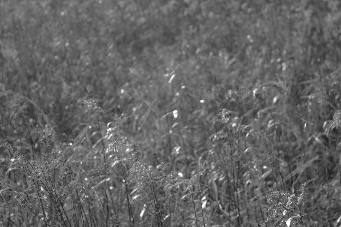
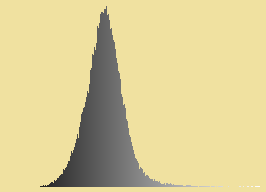

In [59]:
img = cv.imread('immagini/badContrast.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

h, w = img.shape[:2]
scala = 3

img = cv.resize(img, (w//scala, h//scala))

hist = cv.calcHist([img], [0], None, [256], [0, 256]).squeeze()
hist = va.draw_hist(hist)

va.show(img, hist)

699392.0
255.0



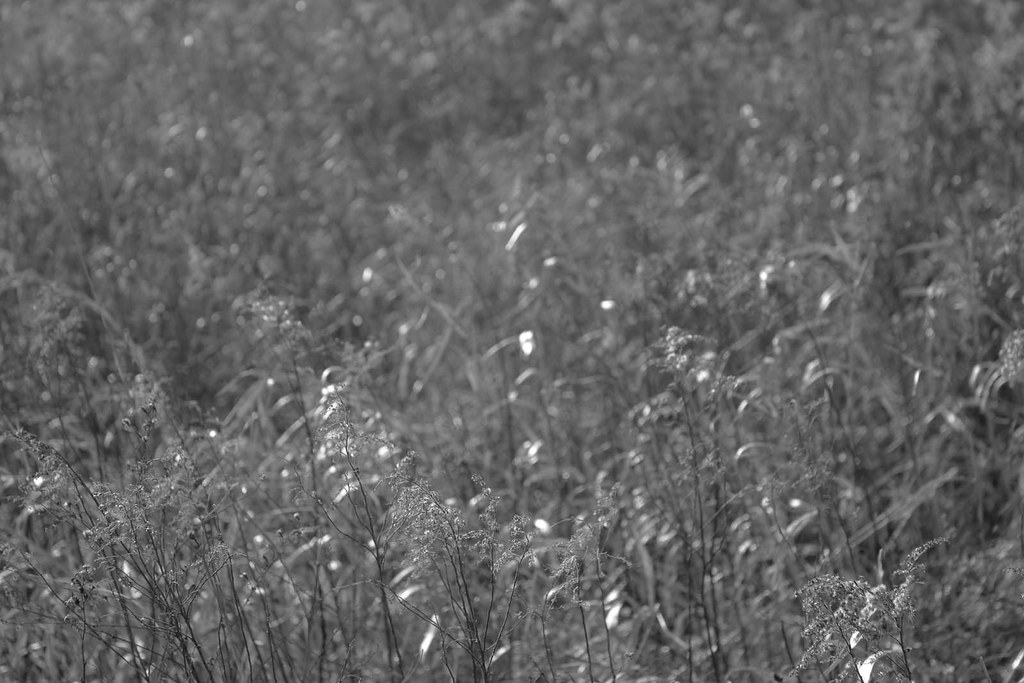
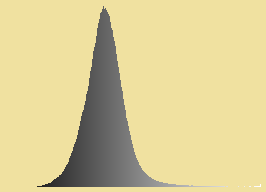
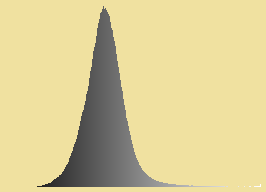

In [46]:
img = cv.imread('immagini/badContrast.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
h, w = img.shape[:2]

hist = cv.calcHist([img], [0], None, [256], [0, 256]).squeeze()
print(hist.sum())

normHist = 255*hist/hist.sum()
print(normHist.sum())


hist = va.draw_hist(hist)
normHist = va.draw_hist(normHist)

va.show(img, hist, normHist)

## contrast stretching

In [30]:
def contrast_stretching(img, a, b):
    img = 255*(img.astype(float)-a)/(b-a)
    
    return np.clip(img, 0, 255).astype(np.uint8)

In [66]:
@interact(minPerc=(0,10), maxPerc=(90,100))
def conrast_stretching(minPerc=5, maxPerc=95):
    stretched = img.copy()
    stretched = contrast_stretching(stretched, np.percentile(img, minPerc), np.percentile(img, maxPerc))
    va.show(img, hist)
    va.show(stretched, va.draw_hist(cv.calcHist([stretched], [0], None, [256], [0, 256]).squeeze()))

interactive(children=(IntSlider(value=5, description='minPerc', max=10), IntSlider(value=95, description='maxP…

## equalizzazione


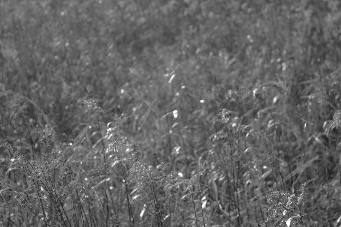
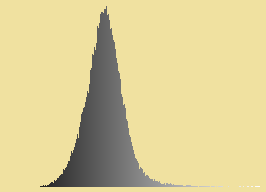


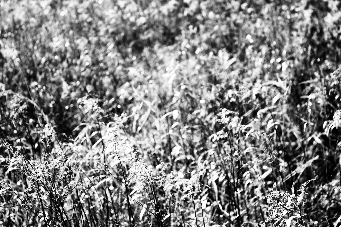
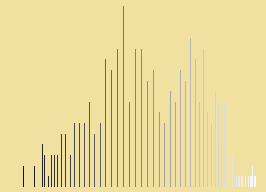

In [60]:
equalized = img.copy()
equalized = cv.equalizeHist(equalized)
va.show(img, hist)
va.show(equalized, va.draw_hist(cv.calcHist(equalized, [0], None, [256], [0, 256]).squeeze()))

##  equalizzazione a mano 
(l'istogramma viene diverso rispetto a quello calcolato tramite la funzione)

https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html


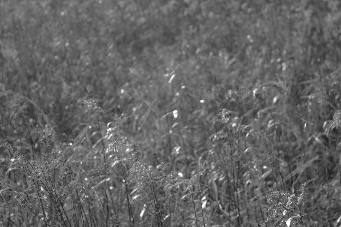
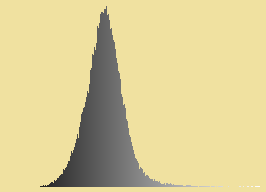


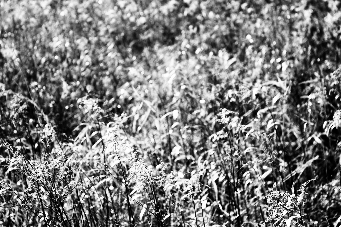
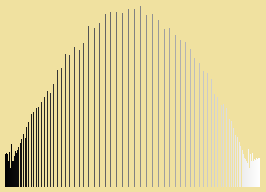

In [65]:
h, w = img.shape[:2]

hist = cv.calcHist([img], [0], None, [256], [0, 256]).squeeze()
newHist = 255*hist/hist.sum()

newHist = np.asarray([newHist[:i].sum() for i in range(len(newHist))], np.uint8)

newImg = cv.applyColorMap(img, newHist)

hist = va.draw_hist(hist)
newHist = va.draw_hist(newHist)
va.show(img, hist)



newHist = cv.calcHist([newImg], [0], None, [256], [0, 256]).squeeze()
newHist = va.draw_hist(newHist)

va.show(newImg, newHist)

## binarizzazione


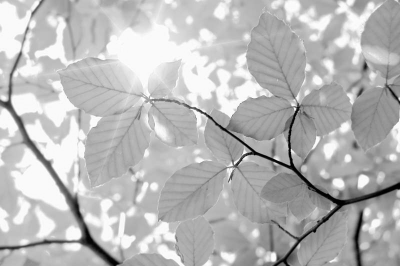
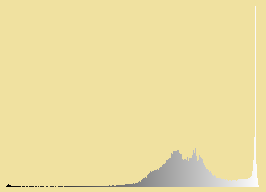

In [5]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

h, w = img.shape[:2]
scala = 2

img = cv.resize(img, (w//scala, h//scala))

hist = cv.calcHist([img], [0], None, [256], [0, 255]).squeeze()
hist = va.draw_hist(hist)
va.show(img, hist)

In [6]:
@interact(thresh=(0, 255))
def binarization(thresh):
    bw = img.copy()
    _, bw = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
    va.show(img, bw)

interactive(children=(IntSlider(value=127, description='thresh', max=255), Output()), _dom_classes=('widget-in…

In [7]:
@interact(k=(3, 21, 2), s=(0, 20))
def binarization(k=9, s=0):
    bw = img.copy()
    bw = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, k, s)
    va.show(img, bw)

interactive(children=(IntSlider(value=9, description='k', max=21, min=3, step=2), IntSlider(value=0, descripti…

## Look up table


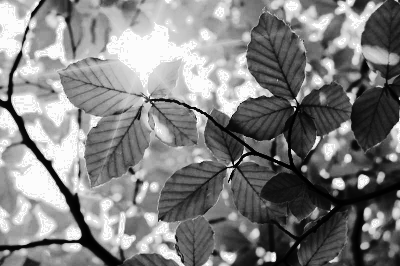
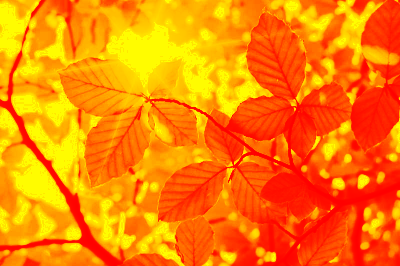

In [8]:
img = cv.equalizeHist(img)
mapped = img.copy()
mapped = cv.applyColorMap(mapped, cv.COLORMAP_AUTUMN)
va.show(img, mapped)

## Resize


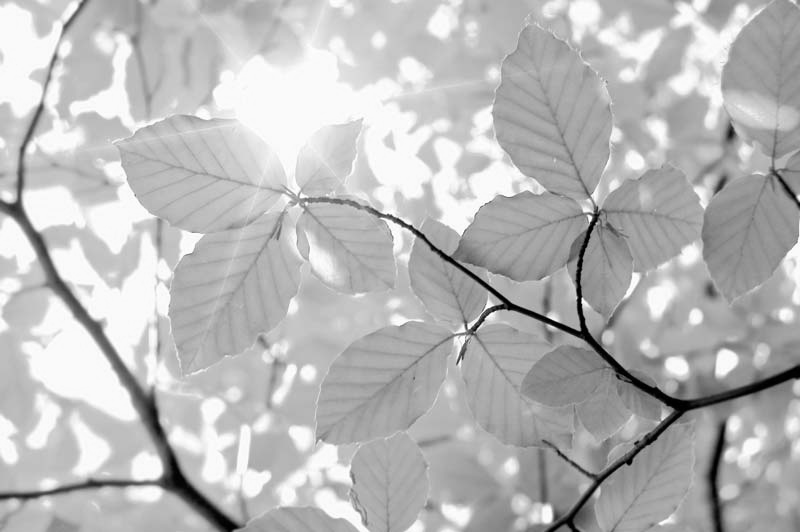
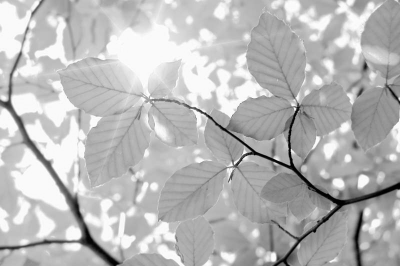

In [27]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

resized = img.copy()
h, w = img.shape[:2]
scala = 2

resized = cv.resize(resized, (w//scala, h//scala))

va.show(img, resized)

## Trasformazioni affini


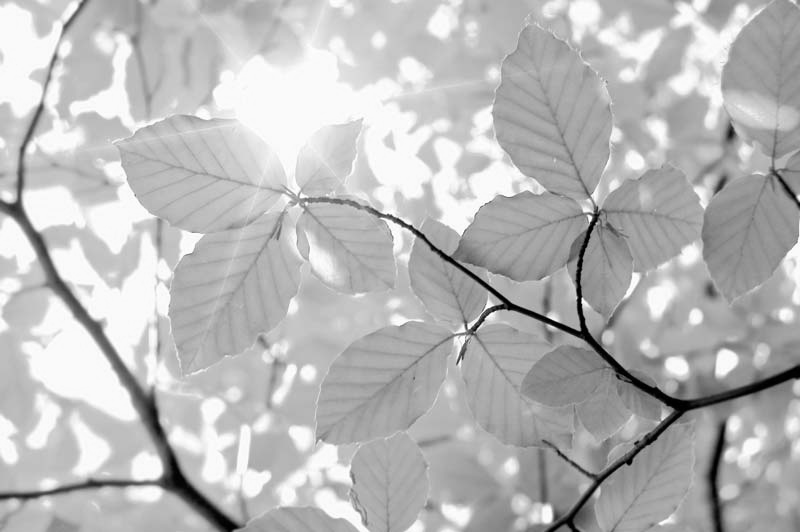
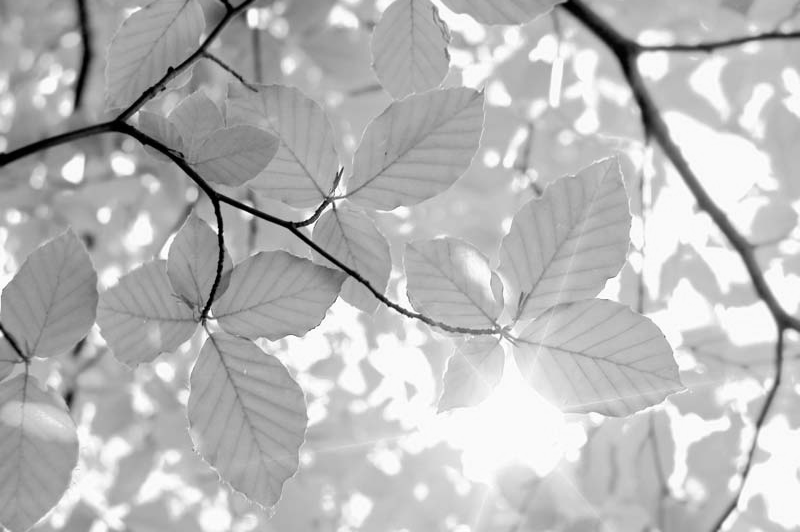

In [369]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
scala = 2

h, w = img.shape[:2]

transformed = img.copy()
t = cv.getAffineTransform(np.array([[0, 0], [w-1, 0], [w-1, h-1]], np.float32),
                               np.array([[w-1, h-1], [0, h-1], [0, 0]], np.float32))
transformed = cv.warpAffine(transformed, t, (w, h), None, cv.INTER_CUBIC, cv.BORDER_CONSTANT, (0,0,0))
va.show(img, transformed)

## Trasformazioni proiettive


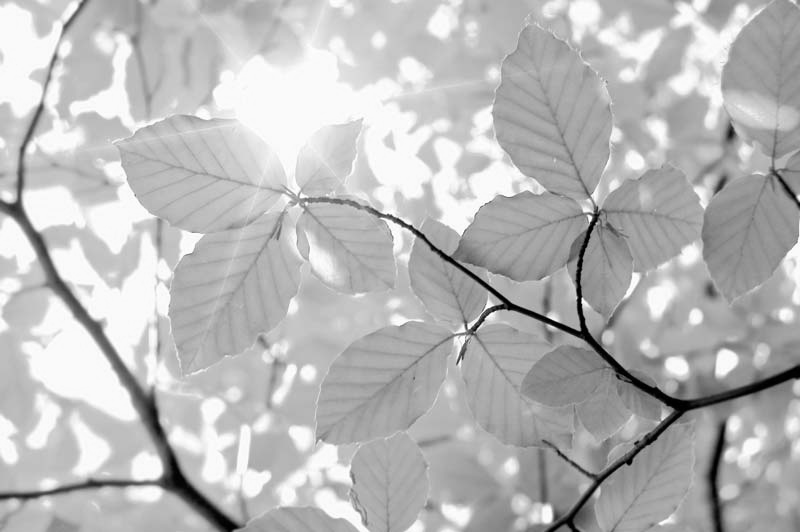
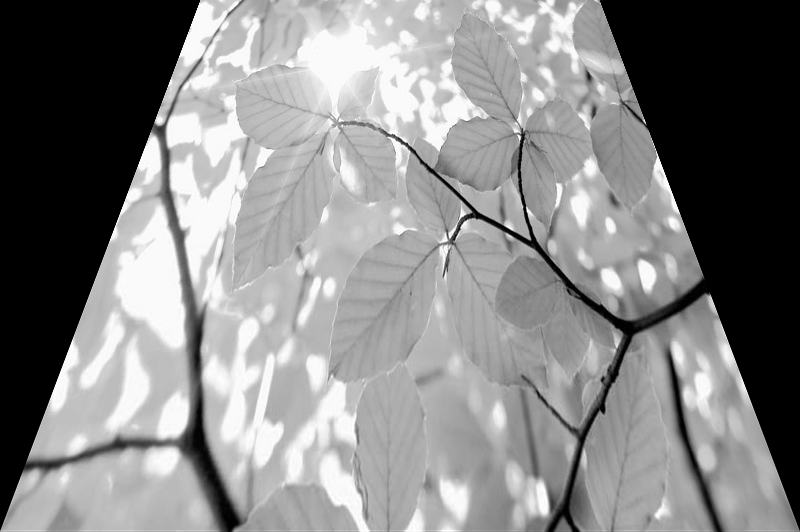

In [36]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
scala = 2

h, w = img.shape[:2]

transformed = img.copy()
t = cv.getPerspectiveTransform(np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32),
                               np.array([[200, 0], [w-1-200, 0], [w-1, h-1], [0, h-1]], np.float32))
transformed = cv.warpPerspective(transformed, t, (w, h), None, cv.INTER_CUBIC, cv.BORDER_CONSTANT, (0,0,0))
va.show(img, transformed)

# Filtri lineari

## filtri di sfocatura

In [48]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 51, 2), sigma=(1,5))
def sfocature(k=29, sigma=4):
    box = cv.boxFilter(img, -1, (k, k), normalize=True)
    gauFilter = cv.getGaussianKernel(k, sigma)
    gau = cv.sepFilter2D(img, -1, gauFilter, gauFilter)
    va.show(img, box, gau)

interactive(children=(IntSlider(value=29, description='k', max=51, min=1, step=2), IntSlider(value=4, descript…

## filtri su immagini a colori

In [146]:
img = cv.imread('immagini/leaves.jpg')

@interact(k=(1, 51, 2), sigma=(1,5))
def sfocature(k=29, sigma=4):
    box = cv.boxFilter(img, -1, (k, k), normalize=True)
    gauFilter = cv.getGaussianKernel(k, sigma)
    gau = cv.sepFilter2D(img, -1, gauFilter, gauFilter)
    va.show(img, box, gau)

interactive(children=(IntSlider(value=29, description='k', max=51, min=1, step=2), IntSlider(value=4, descript…

## median blur

In [144]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 12, 2))
def canny_edge(k=9):
    median = cv.medianBlur(img, k)
    va.show(img, median)

interactive(children=(IntSlider(value=9, description='k', max=12, min=1, step=2), Output()), _dom_classes=('wi…

## Sharpening

In [62]:
img = cv.imread('immagini/out-of-focus.jpeg')


@interact(k=(1, 10, 2))
def sfocature(k=3):
    gauFilter = cv.getGaussianKernel(k, 0)
    
    f_b = gauFilter.T*gauFilter
    f_id = np.zeros_like(f_b)
    f_id[k//2, k//2] = 1
    
    f_b /= f_b.sum()
    
    f = f_id + k*(f_id - f_b)
    
    sharpened = cv.filter2D(img, -1, f) 
    
    va.show(img, sharpened)

interactive(children=(IntSlider(value=3, description='k', max=10, min=1, step=2), Output()), _dom_classes=('wi…

## alte frequenze di un'immagine

In [370]:
img = cv.imread('immagini/toys.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 10, 2), sigma=(0,5))
def sfocature(k=3, sigma=1):
    gauFilter1 = cv.getGaussianKernel(k, sigma)
    g1 = cv.sepFilter2D(img, -1, gauFilter1, gauFilter1)
    high_freq = img - g1
    
    va.show(img, g1, high_freq)

interactive(children=(IntSlider(value=3, description='k', max=10, min=1, step=2), IntSlider(value=1, descripti…

## difference of gaussian

In [76]:
img = cv.imread('immagini/toys.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k1=(1, 10, 2), sigma1=(1,5), k2=(1, 10, 2), sigma2=(1,5))
def sfocature(k1=3, sigma1=1, k2=9, sigma2=1):
    gauFilter1 = cv.getGaussianKernel(k1, sigma1)
    gauFilter2 = cv.getGaussianKernel(k2, sigma2)
    
    g1 = cv.sepFilter2D(img, -1, gauFilter1, gauFilter1)
    g2 = cv.sepFilter2D(img, -1, gauFilter2, gauFilter2)
    
    diff = g1-g2
    norm = cv.normalize(np.clip(diff, 0, 255), None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    
    va.show(img, g1, g2, diff, norm)

interactive(children=(IntSlider(value=3, description='k1', max=10, min=1, step=2), IntSlider(value=1, descript…

## filtri derivativi

### sobel


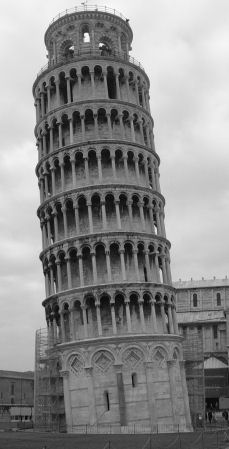
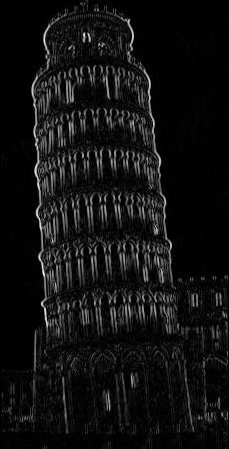
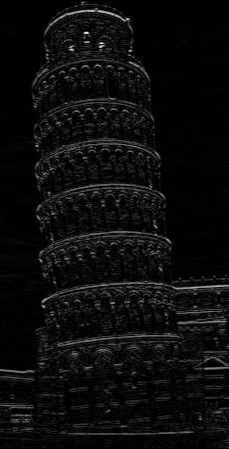
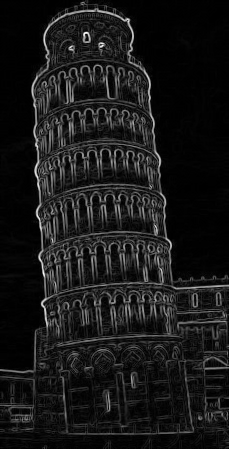
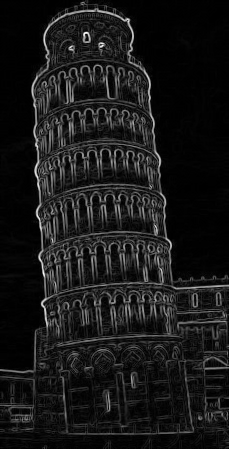

In [17]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sobel_x = cv.Sobel(img, cv.CV_32F, 1, 0)
sobel_y = cv.Sobel(img, cv.CV_32F, 0, 1)
#sobel = cv.Sobel(img, cv.CV_32F, 1, 1)

sobel = cv.magnitude(sobel_x, sobel_y)

sobel_y = abs(sobel_y)
sobel_x = abs(sobel_x)

dx, dy = cv.spatialGradient(img)
dx, dy = dx.astype(np.float32), dy.astype(np.float32) 
spatialGradient = cv.magnitude(dx, dy)

va.show(img, sobel_x, sobel_y, sobel, spatialGradient)

### scharr


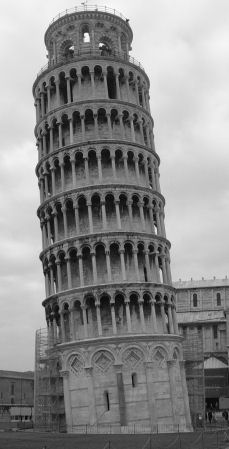
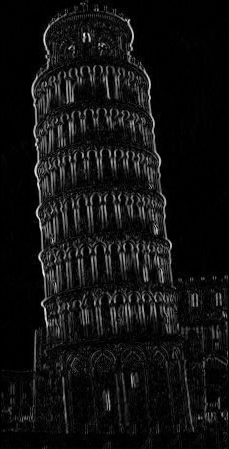
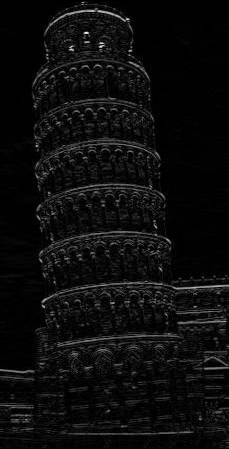
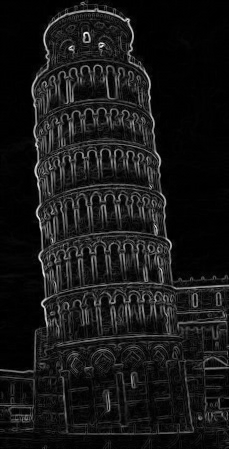

In [36]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

scharr_x = cv.Scharr(img, cv.CV_32F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_32F, 0, 1)

scharr = cv.magnitude(scharr_x, scharr_y)
scharr_y = abs(scharr_y)
scharr_x = abs(scharr_x)

va.show(img, scharr_x, scharr_y, scharr)

## scharr vs sobel


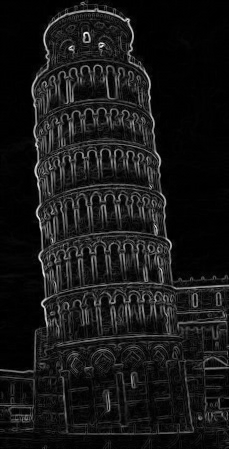
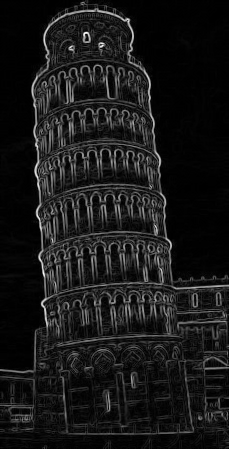

In [37]:
va.show(scharr, sobel)

## canny edge detector

In [105]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 12, 2), t1=(0, 256), t2=(0, 256))
def canny_edge(k=9, t1=62, t2=108):
    canny = cv.GaussianBlur(img, (k, k), 0)
    canny = cv.Canny(canny, t1, t2)
    va.show(img, canny)

interactive(children=(IntSlider(value=9, description='k', max=12, min=1, step=2), IntSlider(value=62, descript…

## canny edge con median blur

In [371]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 21, 2), k1=(1, 12, 2), t1=(0, 256), t2=(0, 256))
def canny_edge(k=21, k1=3, t1=256, t2=0):
    median = cv.medianBlur(img, k)
    canny = cv.GaussianBlur(median, (k1, k1), 0)
    canny = cv.Canny(canny, t1, t2)
    
    contours = cv.cvtColor(img, cv.COLOR_GRAY2BGR) 
    #cv.drawContours(img, [canny], -1, (255,0,0), 1)
    
    va.show(img, median, canny, contours)

interactive(children=(IntSlider(value=21, description='k', max=21, min=1, step=2), IntSlider(value=3, descript…

# estrazione del contorno


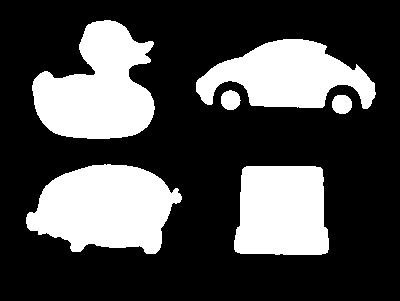
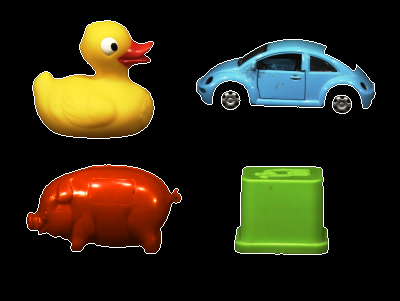

In [39]:
img = cv.imread('immagini/toys.png')

h, l, s = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HLS))
bg = l==0
mask = img.copy()
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
mask[bg] = 0
mask[~bg] = 255
mask = np.uint8(mask)

contours, tree = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for c in contours:
    cv.drawContours(img, [c], -1, (255,255,255), 1)

va.show(mask, img)

## trasformata distanza


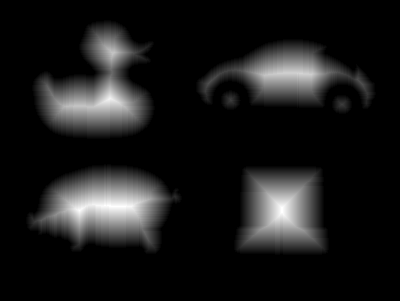
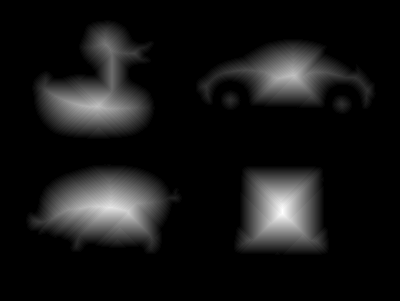

In [53]:
d4 = cv.distanceTransform(mask, cv.DIST_L1, 3)
d8 = cv.distanceTransform(mask, cv.DIST_C, 3)

va.show((d4, 'd4'), (d8, 'd8'))

# etichettatura delle componenti connesse


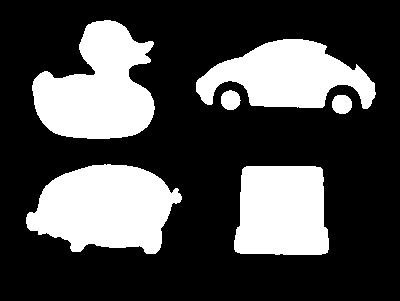
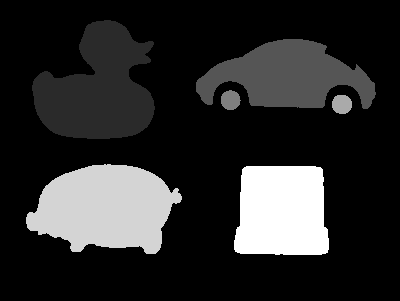

In [7]:
n, cc = cv.connectedComponents(mask)
va.show(mask, cc)

# morfologia matematica

## open vs erode

In [141]:
img = cv.imread('immagini/morph-open.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, img = cv.threshold(img, 128, 256, cv.CV_8U)

@interact(k=(20,40))
def morph_open(k=32):
    se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (k, k))
    o = cv.morphologyEx(img, cv.MORPH_OPEN, se)
    e = cv.morphologyEx(img, cv.MORPH_ERODE, se)

    va.show(img, (o, 'open'), (e, 'erode'))

interactive(children=(IntSlider(value=32, description='k', max=40, min=20), Output()), _dom_classes=('widget-i…

## close vs dilate

In [140]:
img = cv.imread('immagini/morph-close.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, img = cv.threshold(img, 128, 256, cv.CV_8U)

@interact(k=(1,30))
def morph_open(k=24):
    se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (k, k))
    c = cv.morphologyEx(img, cv.MORPH_CLOSE, se)
    d = cv.morphologyEx(img, cv.MORPH_DILATE, se)

    va.show(img, (c, 'close'), (d, 'dilate'))

interactive(children=(IntSlider(value=24, description='k', max=30, min=1), Output()), _dom_classes=('widget-in…

# movimento

In [317]:
frames = []
vidcap = cv.VideoCapture('movimento/pacman.mp4')

count = 0
while True:
    success,image = vidcap.read()
    count += 1
    if not success:
        break
    if(count%2 != 0 and count > 124 and count < 3524):
        frames.append(image[:][30:-20])

In [318]:
@interact(i=(0,len(frames)-1))
def show_frame(i=0):
    va.show(frames[i])

interactive(children=(IntSlider(value=0, description='i', max=1699), Output()), _dom_classes=('widget-interact…

In [319]:
bw_frames = [cv.cvtColor(frames[i], cv.COLOR_BGR2GRAY) for i in range(len(frames))]

In [320]:
@interact(i=(0,len(bw_frames)-1))
def show_frame(i=0):
    va.show(bw_frames[i])

interactive(children=(IntSlider(value=0, description='i', max=1699), Output()), _dom_classes=('widget-interact…

## differenza tra frame successivi

In [321]:
masks = [np.where(bw_frames[i] != bw_frames[i+1], 255, 0) for i in range(len(frames)-1)]

In [322]:
@interact(i=(0,len(masks)-1))
def show_frame(i=0):
    va.show(masks[i])

interactive(children=(IntSlider(value=0, description='i', max=1698), Output()), _dom_classes=('widget-interact…

## background subtractor MOG2

In [323]:
mog = cv.createBackgroundSubtractorMOG2(detectShadows=False)
masks = []
for frame in bw_frames:
    m = mog.apply(frame) # Utilizza l'algoritmo MOG2 sui frame grayscale
    masks.append(m)

## miglioramento delle immagini binarie


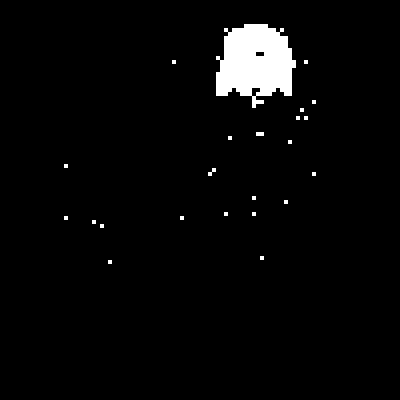


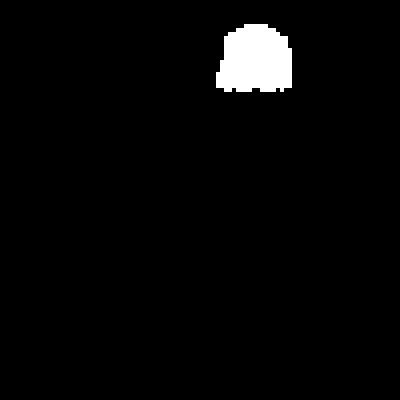

In [327]:
tmp = masks[100].copy()
va.show(tmp[:100, :100])

se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
tmp = cv.morphologyEx(tmp, cv.MORPH_OPEN, se)
tmp = cv.morphologyEx(tmp, cv.MORPH_CLOSE, se)

va.show(tmp[:100, :100])

In [328]:
se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

for i in range(len(masks)):
    masks[i] = cv.morphologyEx(masks[i], cv.MORPH_OPEN, se)
    masks[i] = cv.morphologyEx(masks[i], cv.MORPH_CLOSE, se)
    masks[i] = cv.cvtColor(masks[i], cv.COLOR_GRAY2BGR)

In [329]:
@interact(i=(0,len(masks)-1))
def show_frame(i=0):
    va.show(masks[i]&frames[i])

interactive(children=(IntSlider(value=0, description='i', max=1699), Output()), _dom_classes=('widget-interact…

## mean shift

In [330]:
def get_wnd_and_hist(i, frame, stats, mask):
    """Date le statistiche delle componenti connesse stats, calcola l'istogramma
    della luminosità del bounding box della componente di indice i sui soli pixel
    indicati da mask. Restituisce bounding box e istogramma normalizzato in [0,255]."""
    x, y = stats[i, cv.CC_STAT_LEFT], stats[i, cv.CC_STAT_TOP]
    w, h = stats[i, cv.CC_STAT_WIDTH], stats[i, cv.CC_STAT_HEIGHT]
    roi = cv.cvtColor(frame[y:y+h, x:x+w], cv.COLOR_BGR2GRAY)
    hist = cv.calcHist([roi],[0],mask[y:y+h, x:x+w],[256],[0,255])
    return (x, y, w, h), hist

def get_new_wnd(frame, mask, hist, wnd):
    """Esegue meanShift sulla luminosità di frame ponendo a zero i pixel di background
    secondo mask, utilizzando hist come istogramma e wnd come regione di partenza."""
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # La funzione cv.calcBackProject calcola la mappa di confidenza a partire
    # dall'istogramma e dai valori dei pixel
    conf_map = cv.calcBackProject([gray],[0],hist,[0,255],1)
    conf_map[mask==0] = 0 # Confidenza a zero fuori dalla maschera
    _, new_wnd = cv.meanShift(conf_map, wnd, term_crit)
    return new_wnd

In [331]:
MIN_AREA_IN_WND = 0
MIN_AREA = 140

# Data la sequenza fm di tuple (frame, mask)
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
tracked_objects = [] # (window, hist, label)
next_label = 1
res_tracking = [] # Sequenza di immagini risultato
for i in range(len(masks)):
    
    frame = frames[i]
    mask = masks[i][..., 0]
    
    n, cc, stats, _ = cv.connectedComponentsWithStats(mask)
    cc_used, next_tracked_objects = set(), []
    if n > 1: # Cerca di continuare a inseguire ciascuno degli oggetti
        for wnd,hist,label in tracked_objects:
            x,y,w,h = get_new_wnd(frame, mask, hist, wnd) # Applica meanShift
            # Quanti pixel per ogni etichetta ci sono dentro la nuova finestra?
            cc_hist, _ = np.histogram(cc[y:y+h, x:x+w], n, (0,n))
            index = np.argmax(cc_hist[1:])+1 # La più rappresentata (escluso back)
            if index not in cc_used and cc_hist[index]>=MIN_AREA_IN_WND:
                wnd, hist = get_wnd_and_hist(index, frame, stats, mask)
                next_tracked_objects.append( (wnd,hist,label) )
                cc_used.add(index)
        
    # Controlla se ci sono componenti connesse non abbinate a oggetti
    for i in range(1,n):
        if (stats[i, cv.CC_STAT_AREA] >= MIN_AREA) and (i not in cc_used):
            wnd, hist = get_wnd_and_hist(i, frame, stats, mask)
            next_tracked_objects.append( (wnd, hist, next_label) )
            next_label += 1
    tracked_objects = next_tracked_objects
    
    # Disegna informazioni sugli oggetti nell'immagine risultato
    res = frame.copy()
    for (x,y,w,h),hist,label in tracked_objects:
        cv.rectangle(res, (x,y), (x+w,y+h), 255, 2)
        cv.rectangle(res, (x,y-22), (x+w,y), 255, -1)
        cv.putText(res, f'{label}', (x+5, y-5), cv.FONT_HERSHEY_PLAIN, 0.5, 0, 1)
    # ... altre informazioni, ad es. linea che collega tutti i baricentri di ogni
    # oggetto, contatore che indica da quanti frame è inseguito ciascun oggetto, ...
    res_tracking.append(res)

In [332]:
@interact(i=(0,len(res_tracking)-1))
def show_frame(i=0):
    va.show(res_tracking[i])

interactive(children=(IntSlider(value=0, description='i', max=1699), Output()), _dom_classes=('widget-interact…

## template matching


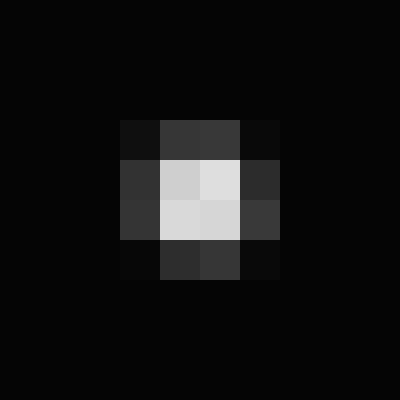

In [333]:
coin = cv.imread('movimento/coin.png')
coin = cv.cvtColor(coin, cv.COLOR_BGR2GRAY)
va.show(coin)

In [366]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

def findCoins(img, template):
    method = eval('cv.TM_SQDIFF_NORMED')
    
    res = cv.matchTemplate(img, template, method)
    
    # trovare la posizione del template nell'immagine
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    res*=100
    
    conf_map = np.asarray(res, np.uint8)
    _, conf_map = cv.threshold(conf_map, 99, 255, cv.THRESH_BINARY)
    return conf_map

In [367]:
@interact(i=(0,len(bw_frames)-1))
def show_frame(i=0):
    conf = findCoins(bw_frames[i], coin)
    n, cc = cv.connectedComponents(255-conf)0
    print(f'{n-1} coins')
    va.show(conf)

interactive(children=(IntSlider(value=0, description='i', max=1699), Output()), _dom_classes=('widget-interact…